In [27]:
import pandas as pd

seurat_scMRMA = pd.read_csv('seurat_scMRMA.csv', index_col = 0).sort_index()[['scMRMA']]
celltypist = pd.read_csv('celltypist.csv', index_col = 0).sort_index()
seurat_singleR = pd.read_csv('seurat_singleR.csv', index_col = 0).sort_index()[['singleR.labels']]

In [37]:
seurat_scMRMA['scMRMA'].value_counts().sort_index()

Acinar cells                           70
Airway goblet cells                  1290
Alpha cells                           850
B cells                              1253
Cholangiocytes                       1472
Delta cells                           267
Dendritic cells                       394
Ductal cells                          889
Endothelial cells                     999
Enterocytes                          1979
Enteroendocrine cell                  116
Enteroendocrine cells                 284
Epsilon cells                         139
Fibroblast                             26
Fibroblasts                          1382
Foveolar cells                      16212
Goblet cells                         1255
Hepatic stellate cells                 29
Mast cells                            211
NK cells                             1635
Pancreas exocrine glandular cell       90
Pericytes                             221
Plasma cells                          909
Secretory cell                    

In [38]:
celltypist['predicted_labels'].value_counts().sort_index()

B cells                        2124
Cycling cells                     6
DC                              264
Double-negative thymocytes       11
Double-positive thymocytes      680
Endothelial cells              1063
Epithelial cells              11418
Erythroid                         2
Fibroblasts                     541
Granulocytes                      1
HSC/MPP                           9
ILC                            1131
MNP                               1
Macrophages                    6275
Mast cells                      224
Megakaryocytes/platelets          2
Mono-mac                          2
Monocytes                       233
Myelocytes                       65
Plasma cells                   2709
T cells                        5546
Name: predicted_labels, dtype: int64

In [51]:
seurat_singleR['singleR.labels'].value_counts().sort_index()

Adipocytes             689
Astrocytes               4
B cells               2153
Chondrocytes             1
DC                      28
Endothelial cells      610
Epithelial cells     23968
Erythrocytes           260
Fibroblasts           1280
HSC/MPP                488
Keratinocytes          543
Macrophages            184
Mesangial cells         62
Monocytes              327
Myocytes                21
NK cells               241
Neurons                 94
Pericytes                9
Skeletal muscle          7
T cells               1271
Name: singleR.labels, dtype: int64

In [50]:
seurat_singleR[(seurat_singleR['singleR.labels'] == 'CD4+ T-cells') | (seurat_singleR['singleR.labels'] == 'CD8+ T-cells')] = 'T cells'
seurat_singleR[seurat_singleR['singleR.labels'] == 'B-cells'] = 'B cells'
seurat_singleR[seurat_singleR['singleR.labels'] == 'HSC'] = 'HSC/MPP'

In [53]:
df_merge = seurat_scMRMA.merge(celltypist, left_index=True, right_index=True).merge(seurat_singleR, left_index=True, right_index=True)

In [127]:
df_merge['celltypist'] = df_merge['predicted_labels']
df_merge['singleR'] = df_merge['singleR.labels']
df_merge[['celltypist', 'scMRMA', 'singleR']]

,celltypist,scMRMA,singleR
patient10__AAACGGGCACGAAGCA.11,Macrophages,Airway goblet cells,Epithelial cells
patient10__AAACGGGCAGAAGCAC.11,Epithelial cells,Goblet cells,Epithelial cells
patient10__AAACGGGGTCAGAGGT.11,Epithelial cells,Cholangiocytes,Epithelial cells
patient10__AAACGGGGTGCAACGA.11,T cells,B cells,T cells
patient10__AAAGATGCAGTAAGCG.11,Epithelial cells,Airway goblet cells,Epithelial cells
...,...,...,...
patient9__TTTGGTTTCAGTTTGG.10,T cells,Airway goblet cells,Epithelial cells
patient9__TTTGTCACAACGATCT.10,Epithelial cells,Enterocytes,Epithelial cells
patient9__TTTGTCACATAGACTC.10,Epithelial cells,Enterocytes,Epithelial cells
patient9__TTTGTCAGTCACCTAA.10,Epithelial cells,Enterocytes,Epithelial cells


In [128]:
df_merge

,scMRMA,predicted_labels,over_clustering,majority_voting,singleR.labels,celltypist,singleR
patient10__AAACGGGCACGAAGCA.11,Airway goblet cells,Macrophages,69,Epithelial cells,Epithelial cells,Macrophages,Epithelial cells
patient10__AAACGGGCAGAAGCAC.11,Goblet cells,Epithelial cells,10,Epithelial cells,Epithelial cells,Epithelial cells,Epithelial cells
patient10__AAACGGGGTCAGAGGT.11,Cholangiocytes,Epithelial cells,95,Epithelial cells,Epithelial cells,Epithelial cells,Epithelial cells
patient10__AAACGGGGTGCAACGA.11,B cells,T cells,205,Plasma cells,T cells,T cells,T cells
patient10__AAAGATGCAGTAAGCG.11,Airway goblet cells,Epithelial cells,49,Epithelial cells,Epithelial cells,Epithelial cells,Epithelial cells
...,...,...,...,...,...,...,...
patient9__TTTGGTTTCAGTTTGG.10,Airway goblet cells,T cells,49,Epithelial cells,Epithelial cells,T cells,Epithelial cells
patient9__TTTGTCACAACGATCT.10,Enterocytes,Epithelial cells,97,Epithelial cells,Epithelial cells,Epithelial cells,Epithelial cells
patient9__TTTGTCACATAGACTC.10,Enterocytes,Epithelial cells,116,Epithelial cells,Epithelial cells,Epithelial cells,Epithelial cells
patient9__TTTGTCAGTCACCTAA.10,Enterocytes,Epithelial cells,116,Epithelial cells,Epithelial cells,Epithelial cells,Epithelial cells


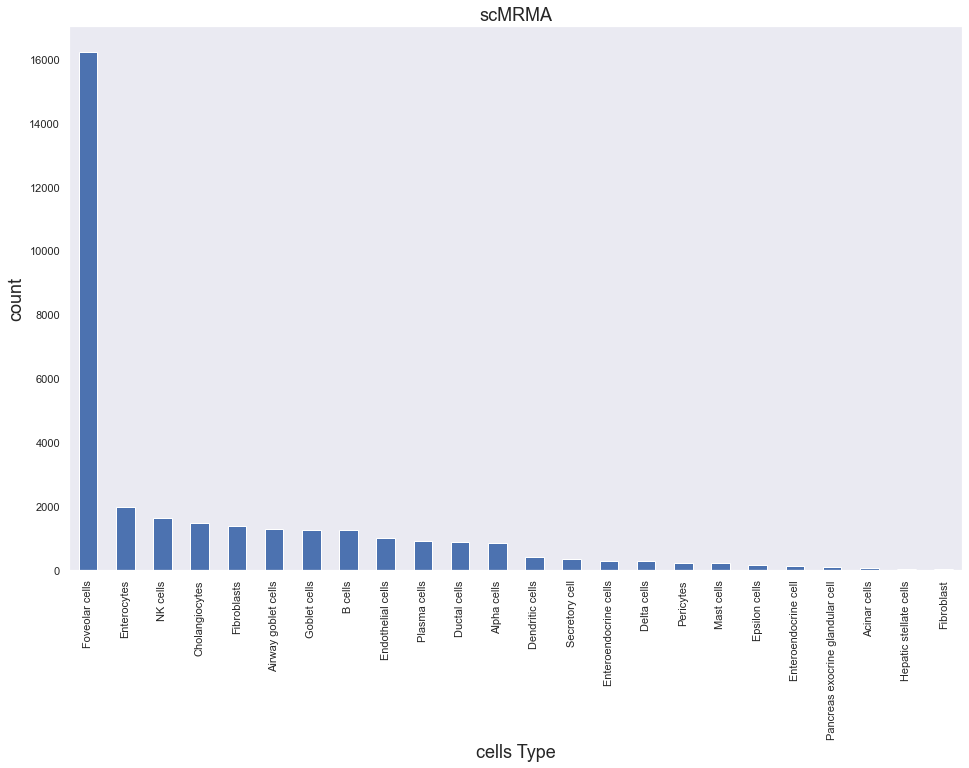

In [122]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
df_merge['scMRMA'].value_counts().plot(kind='bar')
plt.xlabel('cells Type', fontsize=18)
plt.ylabel('count', fontsize=18)
plt.title('scMRMA', fontsize=18)
# plt.show()
plt.savefig('scMRMA_bar.jpg', bbox_inches='tight')

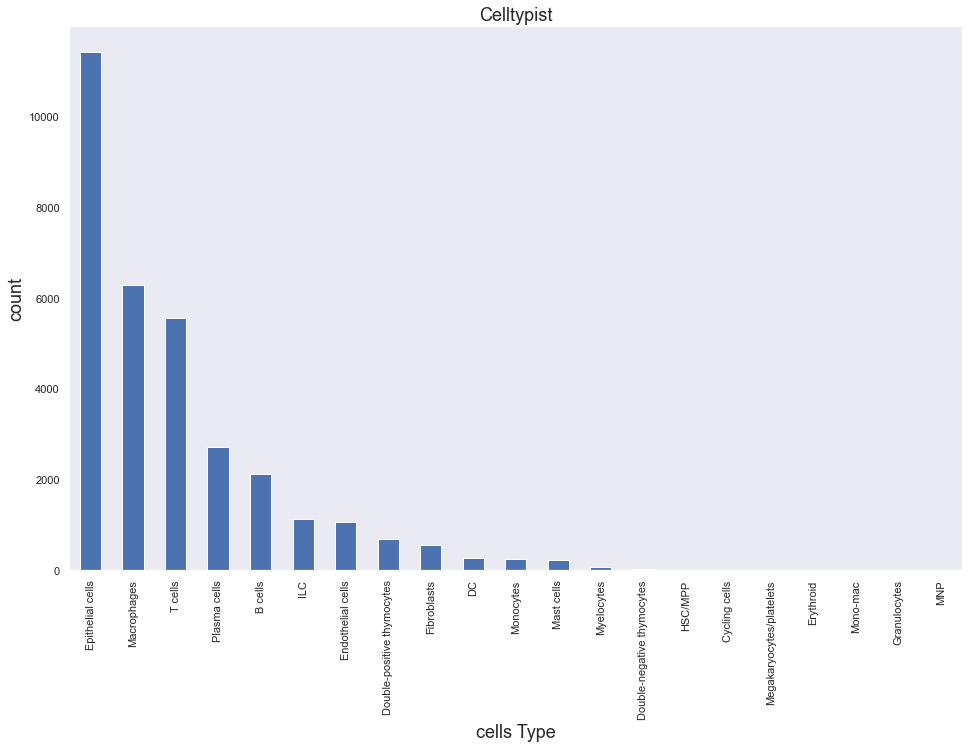

In [125]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
df_merge['predicted_labels'].value_counts().plot(kind='bar')

plt.xlabel('cells Type', fontsize=18)
plt.ylabel('count', fontsize=18)
plt.title('Celltypist', fontsize=18)
# plt.show()
plt.savefig('Celltypist_bar.jpg', bbox_inches='tight')

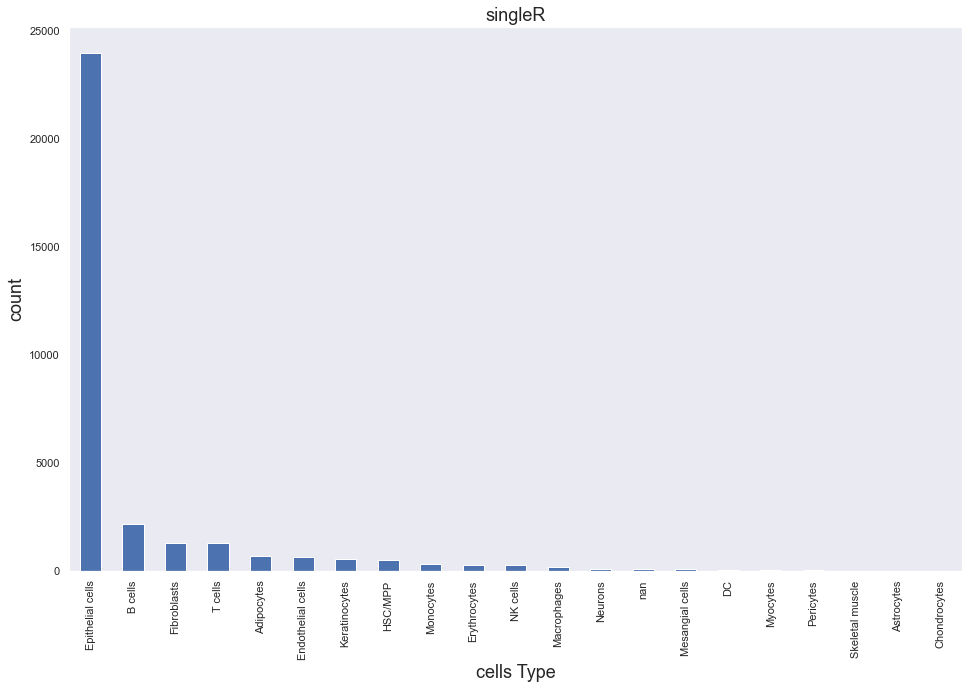

In [124]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
df_merge['singleR.labels'].value_counts().plot(kind='bar')
plt.xlabel('cells Type' ,fontsize=18)
plt.ylabel('count',fontsize=18)
plt.title('singleR',fontsize=18)
# plt.show()
plt.savefig('singleR_bar.jpg', bbox_inches='tight')

In [61]:
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union




In [69]:
df_merge['singleR.labels'] = df_merge['singleR.labels'].astype(str)
df_merge['predicted_labels'] = df_merge['predicted_labels'].astype(str)
df_merge['scMRMA'] = df_merge['scMRMA'].astype(str)

In [70]:
df_merge

,scMRMA,predicted_labels,over_clustering,majority_voting,singleR.labels
patient10__AAACGGGCACGAAGCA.11,Airway goblet cells,Macrophages,69,Epithelial cells,Epithelial cells
patient10__AAACGGGCAGAAGCAC.11,Goblet cells,Epithelial cells,10,Epithelial cells,Epithelial cells
patient10__AAACGGGGTCAGAGGT.11,Cholangiocytes,Epithelial cells,95,Epithelial cells,Epithelial cells
patient10__AAACGGGGTGCAACGA.11,B cells,T cells,205,Plasma cells,T cells
patient10__AAAGATGCAGTAAGCG.11,Airway goblet cells,Epithelial cells,49,Epithelial cells,Epithelial cells
...,...,...,...,...,...
patient9__TTTGGTTTCAGTTTGG.10,Airway goblet cells,T cells,49,Epithelial cells,Epithelial cells
patient9__TTTGTCACAACGATCT.10,Enterocytes,Epithelial cells,97,Epithelial cells,Epithelial cells
patient9__TTTGTCACATAGACTC.10,Enterocytes,Epithelial cells,116,Epithelial cells,Epithelial cells
patient9__TTTGTCAGTCACCTAA.10,Enterocytes,Epithelial cells,116,Epithelial cells,Epithelial cells


In [75]:
singleR_celltypist = df_merge.apply(lambda row: jaccard_similarity(set(row['singleR.labels'].split()), set(row['predicted_labels'].split())), axis=1)

In [76]:
scMRMA_celltypist = df_merge.apply(lambda row: jaccard_similarity(set(row['scMRMA'].split()), set(row['predicted_labels'].split())), axis=1)

In [77]:
singleR_scMRMA = df_merge.apply(lambda row: jaccard_similarity(set(row['singleR.labels'].split()), set(row['scMRMA'].split())), axis=1)

In [78]:
print(singleR_celltypist.mean())
print(scMRMA_celltypist.mean())
print(singleR_scMRMA.mean())


0.5054941653512287
0.255979096377408
0.3272587984028241


In [84]:
print(len(set(df_merge['singleR.labels'])&set(df_merge['scMRMA']))/len(set(df_merge['singleR.labels'])|set(df_merge['scMRMA'])))
print(len(set(df_merge['singleR.labels'])&set(df_merge['predicted_labels']))/len(set(df_merge['singleR.labels'])|set(df_merge['predicted_labels'])))
print(len(set(df_merge['predicted_labels'])&set(df_merge['scMRMA']))/len(set(df_merge['predicted_labels'])|set(df_merge['scMRMA'])))

0.125
0.2727272727272727
0.125


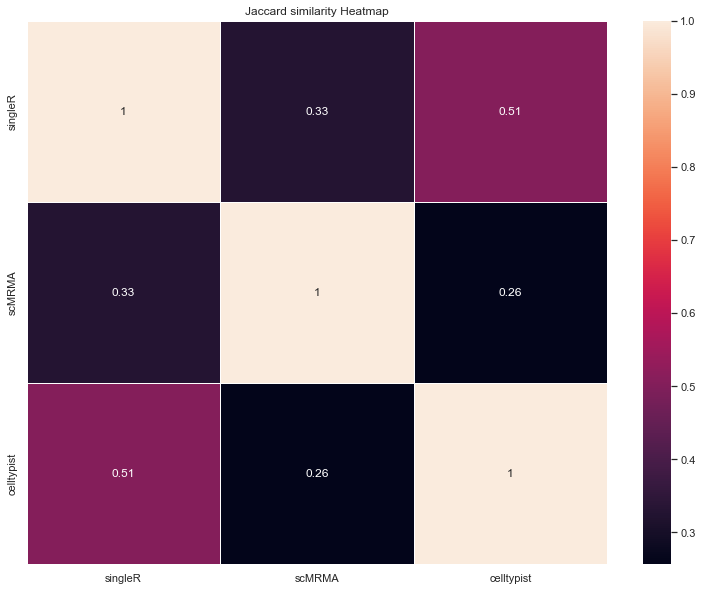

In [101]:
import seaborn as sns

data = {'singleR': [1, 0.327258798, 0.505494165],
        'scMRMA': [0.327258798, 1, 0.255979096],
        'celltypist': [0.505494165, 0.255979096, 1]}


df = pd.DataFrame(data, index=['singleR', 'scMRMA', 'celltypist'])

plt.figure(figsize=(13, 10))
sns.heatmap(df, annot=True, linewidths=.5)
plt.title('Jaccard similarity Heatmap')
plt.savefig('Jaccard similarity Heatmap.jpg')
